<h2><font color="#004D7F" size=6>Proyecto Individual 2. Machine Learning</font></h2>



<h1><font color="#004D7F" size=5> Clasificador precio propiedades Colombia</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Matias Bonfanti</font><br>
<font color="#004D7F" size=3>Soy Henry</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
* [2. Cargar CSV](#section2)
    * [2.1. Cargar Librerias](#section21)
    * [2.2.Importar CSV ](#section22)
    * [2.3.Analisis exploratorio](#section23)
    * [2.4.Seleccion de features](#section24)
* [3. Normalizacion y transformacion](#section3)
    * [3.1.Normalizacion datos null y na](#section31)
    * [3.2.Transformacion datos categoricos](#section32)
* [4. Seleccion Modelo de ML](#section4)
    * [4.1.Preparacion de los datos](#section41)
    * [4.2.Seleccion modelo](#section42)
    * [4.3.Comparacion grafica de los modelos](#section43)
* [5. Implementacion del modelo](#section5)
    * [5.1.Entrenamiento ](#section51)
    * [5.2.Implementacion ](#section52)
    * [5.3.Exportar Resultado ](#section53)

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

​Usted ha sido contactado de una importante empresa inversora dentro del rubro de la inmobiliaria en Colombia, con el fin de que implemente un modelo de clasificación que permita clasificar el precio de las propiedades en venta, utilizando los datos que se han puesto a su disposición correspondientes al año 2020.​Para esto, específicamente, debe predecir la categorización de las propiedades entre baratas o caras, considerando como criterio el valor promedio de los precios (la media).​

<a id="section2"></a>
# <font color="#004D7F"> 2. Cargar CSV</font>

<a id="section21"></a>
## <font color="#004D7F">2.1.Librerias</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from xgboost import XGBClassifier
import missingno as msno
import xgboost as xgb


<a id="section22"></a>
## <font color="#004D7F">2.2.Importar CSV</font>

In [3]:
#Creacion de Dataframes Pandas
df = pd.read_csv('properties_colombia_train.parquet')
df2 = pd.read_csv('properties_colombia_test.parquet')

In [4]:
#Verificar la carga del train
df.sample(1)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
113496,225249,ljdOAj4jAFlDXDbgwfz+5Q==,Propiedad,2020-09-02,2020-09-03,2020-09-02,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,620000000.0,COP,NaN,Apartamento en Venta Ubicado en MEDELLIN,Codigo Inmueble 6250 Lujoso apartamento con 3 ...,Apartamento,Venta,POINT EMPTY
93454,540945,Og74QkH2Ionce0F6kb8Njg==,Propiedad,2020-11-23,2021-05-26,2020-11-23,4.679925,-74.054734,Colombia,Cundinamarca,...,NaN,NaN,420000000.0,COP,NaN,"Venta Apartamento Chico, Bogotá","Excelente ubicación, sector exclusivo, buen gu...",Apartamento,Venta,POINT (-74.0547344233 4.679925)


In [5]:
#Verificar la carga del test
df2.sample(1)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry
32906,593228,oM4AUK1HTi8piBIj+oeQCg==,Propiedad,2020-12-18,2021-02-17,2020-12-18,6.271019,-75.605448,Colombia,Antioquia,...,2.0,NaN,NaN,COP,NaN,Apartamento en Venta Calasanz Medellín,"Cerca a: Mall Santana, Merkepaisa Calasanz. Ub...",Apartamento,Venta,POINT (-75.60544796 6.27101944)
21245,674920,HJ4cAFuVRpptG/jCR4t1lw==,Propiedad,2020-08-24,9999-12-31,2020-08-24,4.660174,-74.057347,Colombia,Cundinamarca,...,NaN,NaN,NaN,COP,NaN,"OFICINAS EN VENTA O ARRIENDO Chapinero, Bogotá",Elegantes oficinas ubicadas en excelente secto...,Oficina,Venta,POINT (-74.0573466754 4.6601739378)


<a id="section23"></a>
## <font color="#004D7F">2.3.Analisis exploratorio</font>

## Descripción de las dimensiones
- id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- ad_type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- lat - Latitud.
- lon - Longitud.
- l1 - Nivel administrativo 1: país.
- l2 - Nivel administrativo 2: usualmente provincia.
- l3 - Nivel administrativo 3: usualmente ciudad.
- l4 - Nivel administrativo 4: usualmente barrio.
- l5 - Nivel administrativo 5.
- l6 - Nivel administrativo 6.
- rooms - Cantidad de ambientes.
- bedrooms - Cantidad de dormitorios (útil en el resto de los países).
- bathrooms - Cantidad de baños.
- surface_total - Superficie total en m².
- surface_covered - Superficie cubierta en m².
- price - Precio publicado en el anuncio.
- currency - Moneda del precio publicado.
- price_period - Periodo del precio (Diario, Semanal, Mensual)
- title - Título del anuncio.
- description - Descripción del anuncio.
- property_type - Tipo de propiedad (Casa, Departamento, PH).
- operation_type - Tipo de operación (Venta).
- geometry - Puntos geométricos formados por las coordenadas latitud y longitud. 

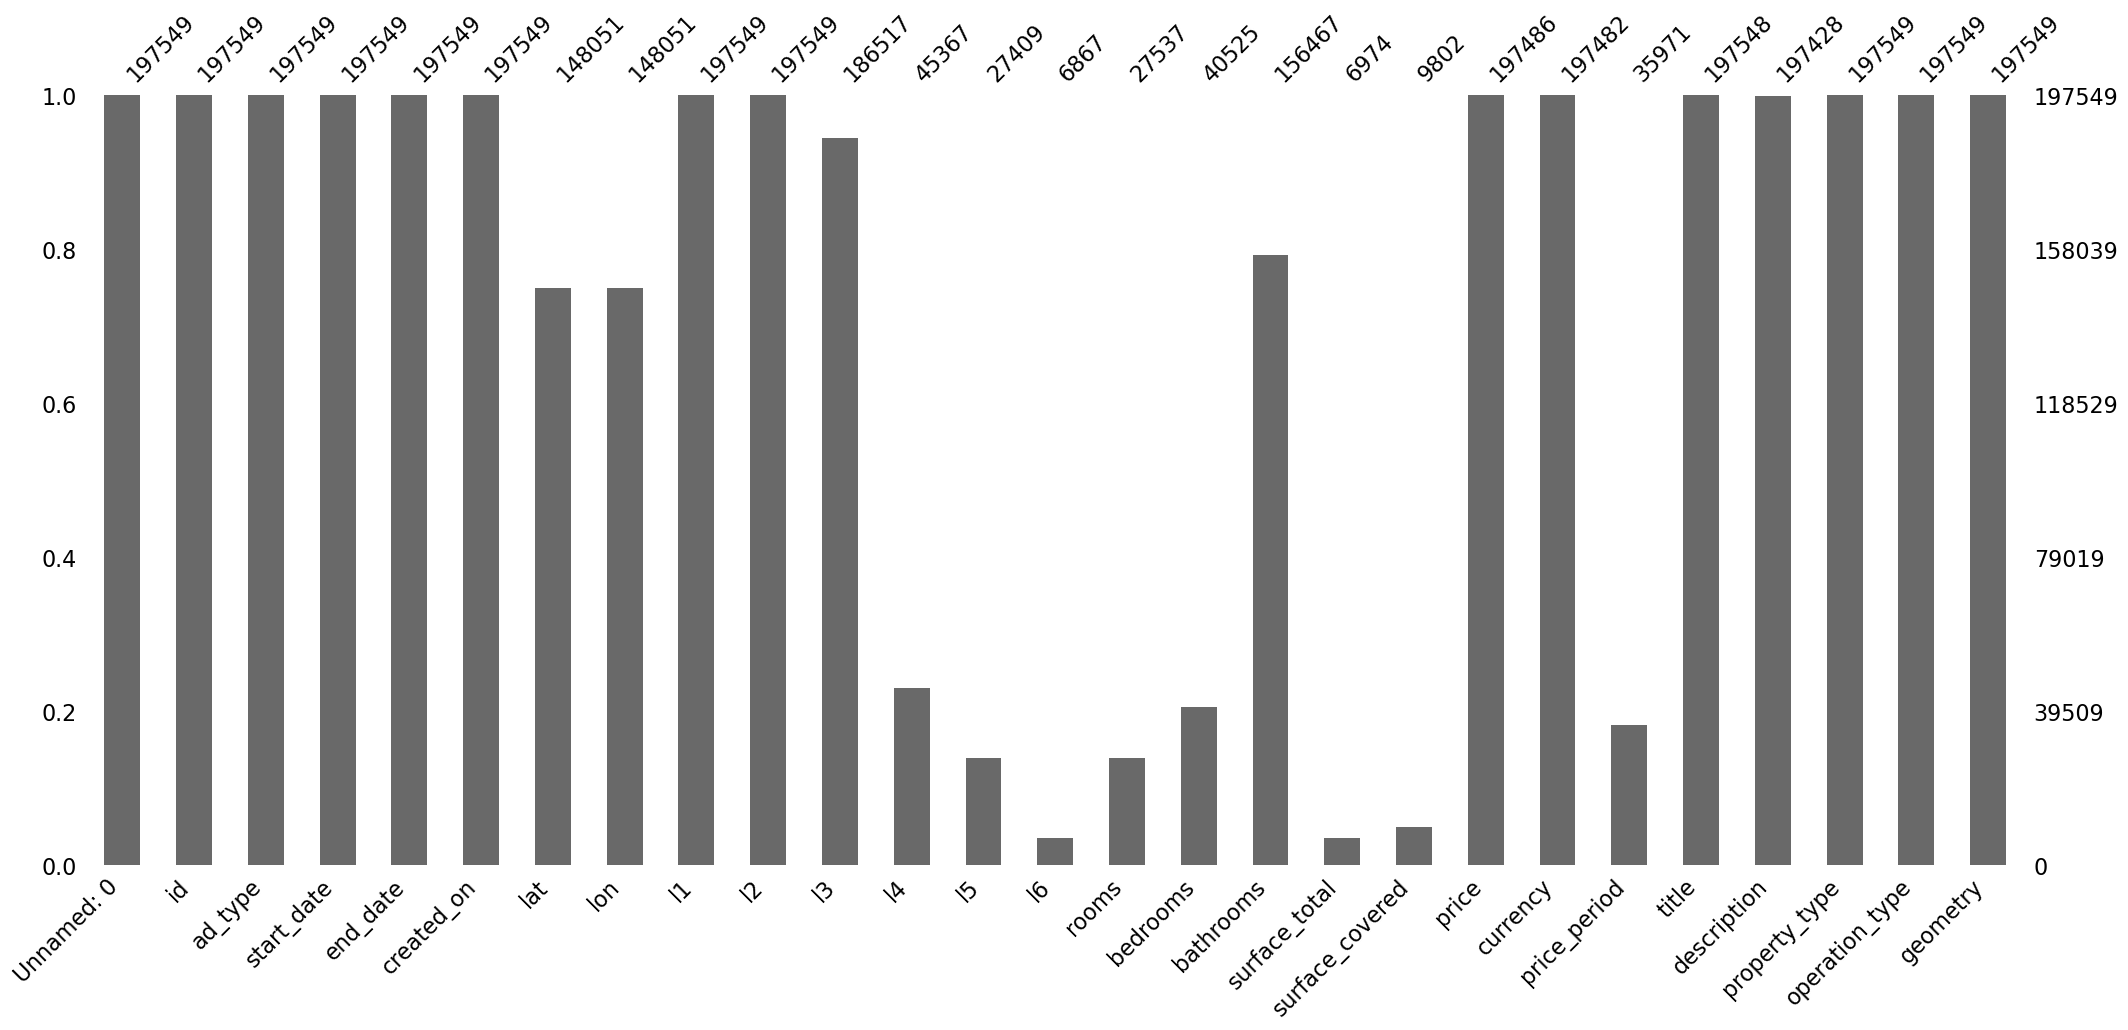

In [6]:
#Verificacion de Datos por Columna
msno.bar(df)
plt.show()

<a id="section24"></a>
## <font color="#004D7F">2.4.Seleccion de features</font>

Para el entrenamiento del modelo voy a seleccionar 3 columnas con datos categoricos y 1 con datos numericos que cumplieron con el siguiente criterio:
 - Tener mas de 75% de los datos
 -

Creacion de la columna clasificacion apartir de price, si el valor de price es mayor a la media del dataset la propiedad se considera cara


In [7]:
#Calculamos la media de price para aplicar a las filas incompletas
media_price = df['price'].mean()
df['price'] = df['price'].fillna(media_price)

In [8]:
#Creacion de la columan clasificacion apartir de price 
df['clasificacion'] = df['price'].apply( lambda x: 'caro' if x>=media_price else 'barato')

In [9]:
#Verificacion de la columna clasificacion
print(len(df['clasificacion'])), df.groupby('clasificacion').size() 

197549


(None,
 clasificacion
 barato    151128
 caro       46421
 dtype: int64)

In [10]:
#Creacion de los Dataset para entrenamiento y test
Xtrain = df[['l2','l3','bathrooms','property_type','clasificacion']]
Xtest = df2[['l2','l3','bathrooms','property_type']]


<a id="section3"></a>
# <font color="#004D7F"> 3. Normalizacion y transformacion </font>

<a id="section31"></a>
## <font color="#004D7F">3.1.Normalizacion datos null y na</font>

In [11]:
#Verificacion de valores faltantes
Xtrain.isna().sum()

l2                   0
l3               11032
bathrooms        41082
property_type        0
clasificacion        0
dtype: int64

In [12]:
#Calculo de la media para completar los valores faltantes
mediabath = Xtrain['bathrooms'].mean()


In [13]:
#Ciudad que mas se repite
df.groupby('l3').size().sort_values()

l3
Choachí             1
Buesaco             1
Buenaventura        1
Sutamarchán         1
Tibasosa            1
                ...  
Manizales       14128
Barranquilla    15133
Cali            20846
Bogotá D.C      28731
Medellín        43404
Length: 293, dtype: int64

In [14]:
#Completamos los valores faltantes 
Xtrain['bathrooms'] = Xtrain['bathrooms'].fillna(mediabath)
Xtrain['l3'] = Xtrain['l3'].fillna('Medellín')


Xtest['bathrooms'] = Xtest['bathrooms'].fillna(mediabath)
Xtest['l3'] = Xtest['l3'].fillna('Medellín')


/tmp/ipykernel_25821/3404862205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['bathrooms'] = Xtrain['bathrooms'].fillna(mediabath)
/tmp/ipykernel_25821/3404862205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['l3'] = Xtrain['l3'].fillna('Medellín')
/tmp/ipykernel_25821/3404862205.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [15]:
#Verificacion de valores faltantes
Xtrain.isna().sum()

l2               0
l3               0
bathrooms        0
property_type    0
clasificacion    0
dtype: int64

<a id="section32"></a>
## <font color="#004D7F">3.2.Transformacion datos categoricos</font>

In [16]:
#Transformacion de los datos categoricos
codificador = OrdinalEncoder()
Xtrain = pd.DataFrame(codificador.fit_transform(Xtrain),columns=['l2','l3','bathrooms','property_type','clasificacion'])
Xtest = pd.DataFrame(codificador.fit_transform(Xtest),columns=['l2','l3','bathrooms','property_type'])
print(Xtrain)

          l2     l3  bathrooms  property_type  clasificacion
0        1.0  148.0        4.0            1.0            1.0
1       12.0   27.0        1.0            0.0            0.0
2       12.0   27.0        1.0            1.0            0.0
3       26.0   29.0        0.0            6.0            1.0
4        1.0  148.0        1.0            0.0            0.0
...      ...    ...        ...            ...            ...
197544  12.0   27.0        2.0            0.0            0.0
197545  12.0   27.0        0.0            5.0            0.0
197546  29.0   38.0        0.0            6.0            0.0
197547  12.0   27.0        1.0            1.0            0.0
197548   3.0   24.0        0.0            0.0            0.0

[197549 rows x 5 columns]


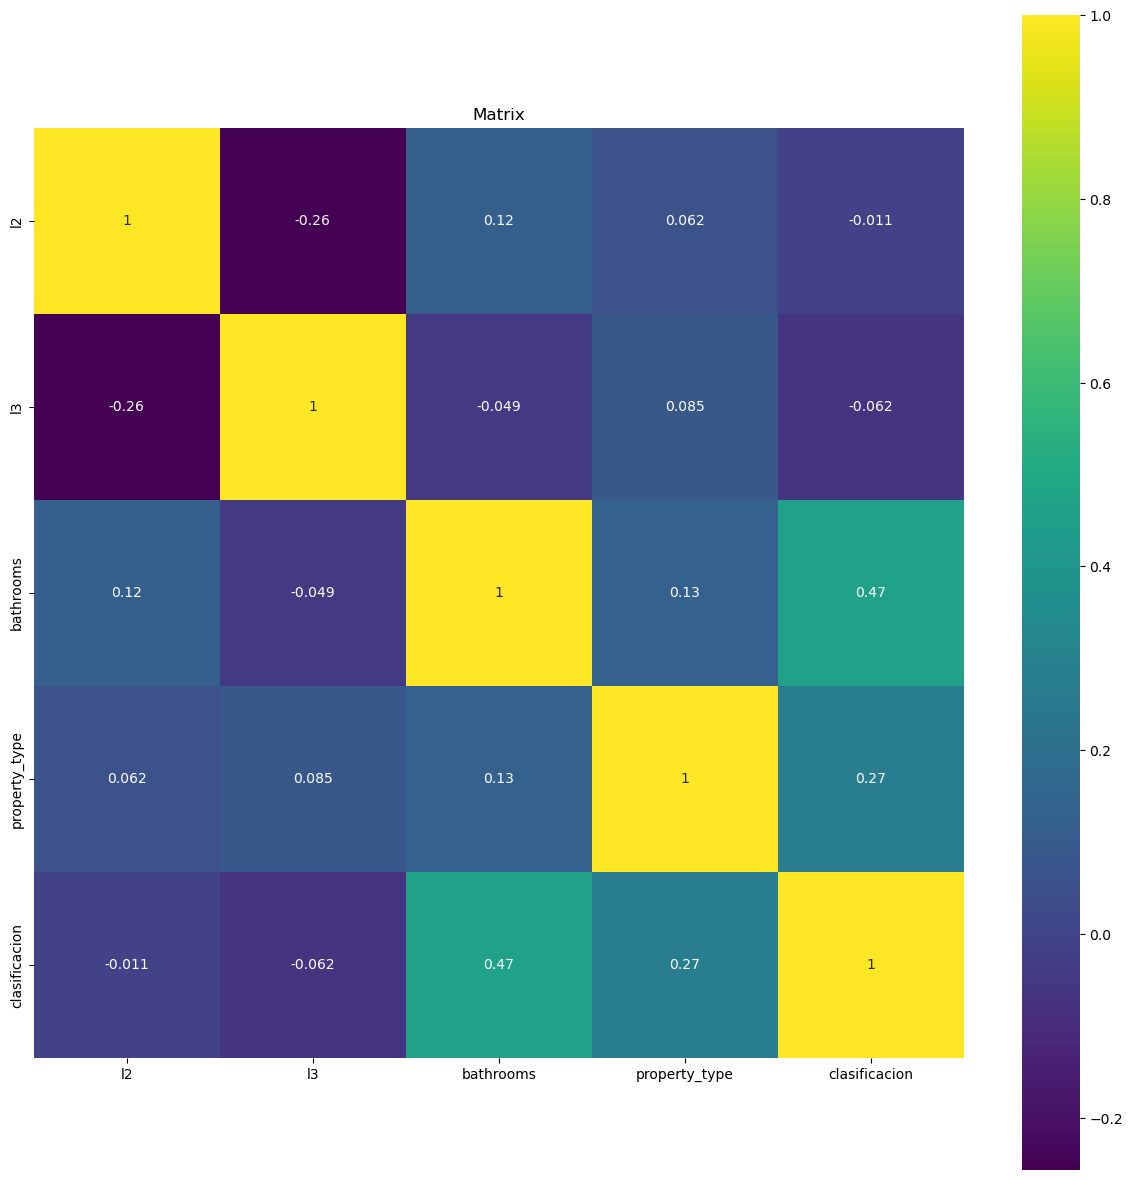

In [17]:
#Visualizacion Correlacion
correlacion = Xtrain.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(correlacion, vmax =1, square=True, annot=True, cmap= 'viridis')
plt.title('Matrix')
plt.show()

<a id="section4"></a>
# <font color="#004D7F"> 4. Seleccion Modelo de ML</font>

<a id="section41"></a>
## <font color="#004D7F">4.1.Preparacion de los datos </font>

In [18]:
#Separacion de las columnas de entrenamiento y target. Se transforman en array de numpy
array = Xtrain.values
X = array[:,0:4]
Y = array[:,4]

<a id="section42"></a>
## <font color="#004D7F">4.2.Seleccion modelo </font>

In [19]:
#Verificacion de los posibles modelos a implementar
#Los hiperparametros estan configurados por defecto
models = []
models.append(('LoR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('k-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB',XGBClassifier()))
#models.append(('SVM', SVC(gamma='auto', C=2.0, kernel= 'linear')))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state= 7, shuffle=True )
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f'{name}: {cv_results.mean()*100.0:,.2f}% {cv_results.std()*100.0:,.2f}%')

LoR: 81.10% 0.16%
LDA: 81.14% 0.19%
k-NN: 82.01% 0.48%
CART: 83.98% 0.16%
NB: 79.45% 0.27%
XGB: 83.89% 0.17%


<a id="section43"></a>
## <font color="#004D7F">4.3.Comparacion grafica de los modelos </font>

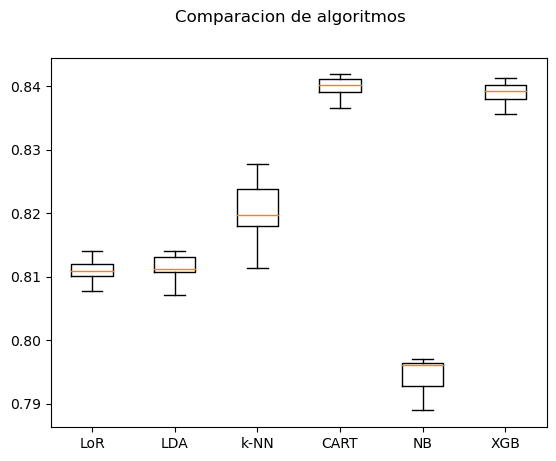

In [20]:
#Visualizacion de la distribucion media de los resultados
fig = plt.figure()
fig.suptitle('Comparacion de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

El modelo seleccionado es DecisionTreeClassifier, por tener la mejor distribucion media de resultados, se ajustan los hiperparametros para balancear el targey y se limita el numero de ramas

<a id="section5"></a>
# <font color="#004D7F"> 5. Implementacion del modelo</font>

<a id="section51"></a>
## <font color="#004D7F">5.1.Entrenamiento </font>

In [21]:
#Entrenamos el modelo y ajustamos los hiperparametros
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
model = DecisionTreeClassifier(criterion='entropy',class_weight= 'balanced',max_leaf_nodes=4).fit(X,Y)
results = cross_val_score(model, X, Y, cv=kfold)
print(f'Accuracy: {results.mean()*100.0:,.2f}% {results.std()*100.0:,.2f}%')

Accuracy: 64.91% 0.28%


<a id="section52"></a>
## <font color="#004D7F">5.2.Implementacion </font>

In [22]:
#Probamos el modelo con los datos de test
pred = model.predict(Xtest)
pred

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1., 1., 0., ..., 1., 0., 0.])

<a id="section53"></a>
## <font color="#004D7F">5.3.Exportar Resultado </font>

In [23]:
#Exportamos los resultados al csv
resul = pd.DataFrame(pred)
resul.to_csv('BonfantiMatias.csv',index=None,header=True)